In [3]:
import pandas as pd
import json
from datetime import datetime
import numpy as np

# Reading JSON file for Reciepts 

- The zip file is already extracted we can also use a package gzip to extract the zip file 

In [4]:
df_receipts = pd.read_json('receipts.json',lines=True)

In [5]:
df_receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [7]:
df_receipts.shape

(1119, 15)

Here if you look at the data set it has 15 columns ie it has 15 feature. Also if you look carefully some features value has some data in data and it needs to be extracted. Example if you look at the 'rewardsReceiptItemList' example shown below

In [22]:
df_receipts['rewardsReceiptItemList'].iloc[0]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '26.00',
  'itemPrice': '26.00',
  'needsFetchReview': False,
  'partnerItemId': '1',
  'preventTargetGapPoints': True,
  'quantityPurchased': 5,
  'userFlaggedBarcode': '4011',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '26.00',
  'userFlaggedQuantity': 5}]

# Creating a new table from the rewardsReceiptItemList
Now looking for primary key so that I can join it with reciept table with primary key and foriegn key relation

In [57]:
import pandas as pd
import numpy as np

expected_columns = [
    'barcode', 'description', 'finalPrice', 'itemPrice', 'needsFetchReview',
    'partnerItemId', 'preventTargetGapPoints', 'quantityPurchased',
    'userFlaggedBarcode', 'userFlaggedNewItem', 'userFlaggedPrice',
    'userFlaggedQuantity', 'needsFetchReviewReason', 'pointsNotAwardedReason',
    'pointsPayerId', 'rewardsGroup', 'rewardsProductPartnerId',
    'userFlaggedDescription', 'originalMetaBriteBarcode',
    'originalMetaBriteDescription', 'brandCode', 'competitorRewardsGroup',
    'discountedItemPrice', 'originalReceiptItemText', 'itemNumber',
    'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
    'competitiveProduct', 'originalFinalPrice', 'originalMetaBriteItemPrice',
    'deleted', 'priceAfterCoupon', 'metabriteCampaignId', '_id'
]

normalized_data = []

for index, row in df_receipts.iterrows():
    oid_value = row['_id']['$oid'] if isinstance(row['_id'], dict) and '$oid' in row['_id'] else np.nan
    items_list = row['rewardsReceiptItemList']
    
    # Check if items_list is a list and not NaN or another type
    if isinstance(items_list, list):
        for item in items_list:
            # Extract data for each item, defaulting to NaN if not found
            item_data = {col: item.get(col, np.nan) for col in expected_columns if col != '_id'}
            item_data['_id'] = oid_value
            normalized_data.append(item_data)
    else:
        # Handle the case where items_list is not a list (e.g., NaN)
        item_data = {col: np.nan for col in expected_columns}
        item_data['_id'] = oid_value
        normalized_data.append(item_data)

# Convert the list of dictionaries into a DataFrame
finaldf_receipts_rewards = pd.DataFrame(normalized_data)

# Ensure all expected columns are present, even if some were never filled
for column in expected_columns:
    if column not in finaldf_receipts_rewards.columns:
        finaldf_receipts_rewards[column] = np.nan

# final_df now correctly handles cases where 'rewardsReceiptItemList' might not be a list.


In [58]:
finaldf_receipts_rewards

,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,...,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId,_id
0,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1eb0a720f0523000575
1,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
2,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1bb0a720f052300056b
3,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1f10a720f052300057a
4,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5ff1e1ee0a7214ada100056f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603d0b710a720fde1000042a
7377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603cf5290a720fde10000413
7378,B076FJ92M4,mueller austria hypergrind precision electric ...,22.97,22.97,NaN,0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.97,NaN,603ce7100a7217c72c000405
7379,B07BRRLSVC,thindust summer face mask - sun protection nec...,11.99,11.99,NaN,1,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.99,NaN,603ce7100a7217c72c000405


Add a primary key as reward_id to the finaldf_receipts_rewards and rename _id as r_id

In [60]:
finaldf_receipts_rewards['reward_id'] = range(1, len(finaldf_receipts_rewards) + 1)

In [61]:
# Get the list of columns, making sure 'id' is at the beginning
columns = ['reward_id'] + [col for col in finaldf_receipts_rewards.columns if col != 'reward_id']

# Reorder the DataFrame columns
finaldf_receipts_rewards = finaldf_receipts_rewards[columns]

In [65]:
#finaldf_receipts_rewards.head()

In [63]:
finaldf_receipts_rewards.rename(columns={'_id': 'r_id'}, inplace=True)
columns = list(finaldf_receipts_rewards.columns)
columns.remove('r_id')
columns.insert(1, 'r_id')
finaldf_receipts_rewards = finaldf_receipts_rewards[columns]



In [64]:
finaldf_receipts_rewards.head()

,reward_id,r_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,1,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You can see I have created reward_id as primary key which is unique also I have added a foriegnkey to the new table finaldf_receipts_rewards from the main table df_receipts

In [66]:
finaldf_receipts_rewards.columns

Index(['reward_id', 'r_id', 'barcode', 'description', 'finalPrice',
       'itemPrice', 'needsFetchReview', 'partnerItemId',
       'preventTargetGapPoints', 'quantityPurchased', 'userFlaggedBarcode',
       'userFlaggedNewItem', 'userFlaggedPrice', 'userFlaggedQuantity',
       'needsFetchReviewReason', 'pointsNotAwardedReason', 'pointsPayerId',
       'rewardsGroup', 'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

In [68]:
finaldf_receipts_rewards.shape

(7381, 36)

In [69]:
finaldf_receipts_rewards.isna().sum()

reward_id                                0
r_id                                     0
barcode                               4291
description                            821
finalPrice                             614
itemPrice                              614
needsFetchReview                      6568
partnerItemId                          440
preventTargetGapPoints                7023
quantityPurchased                      614
userFlaggedBarcode                    7044
userFlaggedNewItem                    7058
userFlaggedPrice                      7082
userFlaggedQuantity                   7082
needsFetchReviewReason                7162
pointsNotAwardedReason                7041
pointsPayerId                         6114
rewardsGroup                          5650
rewardsProductPartnerId               5112
userFlaggedDescription                7176
originalMetaBriteBarcode              7310
originalMetaBriteDescription          7371
brandCode                             4781
competitorR

In [70]:
finaldf_receipts_rewards['reward_id'].value_counts()

1       1
4932    1
4930    1
4929    1
4928    1
       ..
2457    1
2456    1
2455    1
2454    1
7381    1
Name: reward_id, Length: 7381, dtype: int64

In [71]:
finaldf_receipts_rewards['r_id'].value_counts()

600f2fc80a720f0535000030    459
600f39c30a7214ada2000030    450
600f24970a720f053500002f    381
600f0cc70a720f053500002c    217
600a1a8d0a7214ada2000008    203
                           ... 
6010bdfa0a7214ada200005a      1
6010be200a7214ada200005e      1
60118c0f0a7214ada200007e      1
60118bea0a720f0535000064      1
603c4fea0a7217c72c000389      1
Name: r_id, Length: 1119, dtype: int64

# In the main table df_receipts features like _id, createDate, dateScanned, finishedDate, modifyDate is not in correct format. Its in dictionary and needs to be extracted

let's make the format correct

In [78]:
df_receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [75]:
df_receipts.shape

(1119, 15)

# Lets make the _id in regular format by extracting it from Dictionary

In [79]:
# Extract the '$oid' value from each dictionary in the '_id' column
df_receipts['_id'] = df_receipts['_id'].apply(lambda x: x.get('$oid') if isinstance(x, dict) and '$oid' in x else None)

# Rename '_id' to 'r_id'
df_receipts.rename(columns={'_id': 'r_id'}, inplace=True)

In [80]:
df_receipts

,r_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614594147000},{'$date': 1614594147000},NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,603d0b710a720fde1000042a,NaN,NaN,{'$date': 1614613361873},{'$date': 1614613361873},NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,603cf5290a720fde10000413,NaN,NaN,{'$date': 1614607657664},{'$date': 1614607657664},NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,{'$date': 1614604048000},{'$date': 1614604048000},NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


# Lets make the createDate, dateScanned, finishedDate, modifyDate, pointsAwardedDate, purchaseDate,  in regular format by extracting it from Dictionary

In [81]:
date_columns = ['createDate', 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']

for col in date_columns:
    if col in df_receipts.columns:
        df_receipts[col] = df_receipts[col].apply(lambda x: pd.to_datetime(x['$date']/1000, unit='s') if isinstance(x, dict) and '$date' in x else (pd.NaT if pd.isna(x) else x))



In [82]:
df_receipts

,r_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31.000000000,2021-01-03 15:25:31.000000000,2021-01-03 15:25:31,2021-01-03 15:25:36.000000000,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43.000000000,2021-01-03 15:24:43.000000000,2021-01-03 15:24:43,2021-01-03 15:24:48.000000000,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37.000000000,2021-01-03 15:25:37.000000000,NaT,2021-01-03 15:25:42.000000000,NaT,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34.000000000,2021-01-03 15:25:34.000000000,2021-01-03 15:25:34,2021-01-03 15:25:39.000000000,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06.000000000,2021-01-03 15:25:06.000000000,2021-01-03 15:25:11,2021-01-03 15:25:11.000000000,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 10:22:27.000000000,2021-03-01 10:22:27.000000000,NaT,2021-03-01 10:22:28.000000000,NaT,25.0,2020-08-17 00:00:00,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,603d0b710a720fde1000042a,NaN,NaN,2021-03-01 15:42:41.872999936,2021-03-01 15:42:41.872999936,NaT,2021-03-01 15:42:41.872999936,NaT,NaN,NaT,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,603cf5290a720fde10000413,NaN,NaN,2021-03-01 14:07:37.664000000,2021-03-01 14:07:37.664000000,NaT,2021-03-01 14:07:37.664000000,NaT,NaN,NaT,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,2021-03-01 13:07:28.000000000,2021-03-01 13:07:28.000000000,NaT,2021-03-01 13:07:29.000000000,NaT,25.0,2020-08-17 00:00:00,2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


In [83]:
df_receipts["r_id"].isna().sum()

0

You can drop rewardsReceiptItemList from df_receipts as already a new table is created for that finaldf_receipts_rewards. I have kept it as it is 

In [84]:
df_receipts.columns

Index(['r_id', 'bonusPointsEarned', 'bonusPointsEarnedReason', 'createDate',
       'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate',
       'pointsEarned', 'purchaseDate', 'purchasedItemCount',
       'rewardsReceiptItemList', 'rewardsReceiptStatus', 'totalSpent',
       'userId'],
      dtype='object')

In [85]:
df_receipts["userId"].value_counts()

5fc961c3b8cfca11a077dd33    436
59c124bae4b0299e55b0f330     58
54943462e4b07e684157a532     50
5fa41775898c7a11a6bcef3e     21
5ff5d15aeb7c7d12096d91a2     20
                           ... 
600258dafb296c4ef805d9b7      1
60024f24e257124ec6b99a13      1
60037005e257124ec6b99ec2      1
60025fe0e257124ec6b99a87      1
60268c78efa6011bb151077d      1
Name: userId, Length: 258, dtype: int64

# Now Lets visualize both the data thats generated:explore and evaluate data of questionable provenance.

In [121]:
# doing shallow copy so that I can change some data point for visualization
df_receipts_Vis=df_receipts.copy()

In [122]:
df_receipts_Vis=df_receipts_Vis.drop(['rewardsReceiptItemList'], axis = 1) 


In [123]:
df_receipts.shape

(1119, 15)

In [124]:
df_receipts_Vis.shape

(1119, 14)

In [125]:
##Remove the rows that has null value in the total spent
df_receipts_Vis.dropna(subset=['totalSpent'], inplace=True)

# Visualizing The Main Table df_receipts

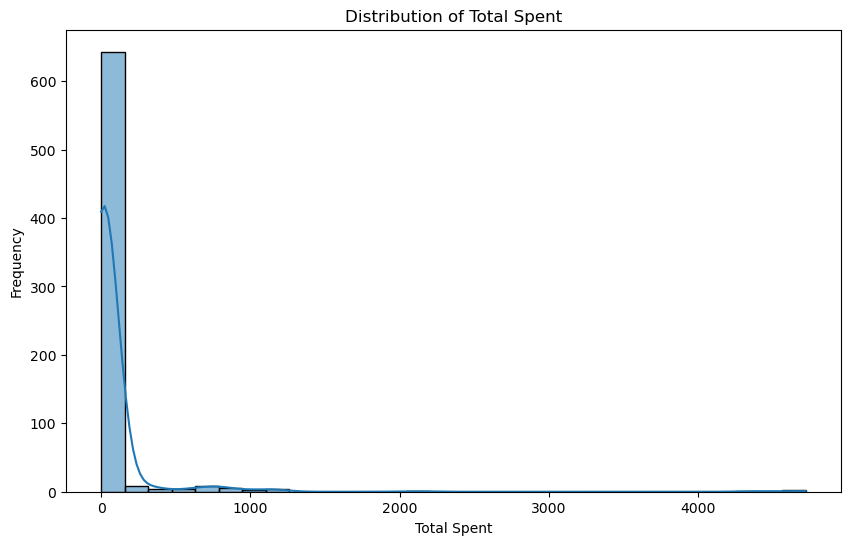

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_receipts, x='totalSpent', bins=30, kde=True)
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

## Observation:

1) The histogram indicates that the "Total Spent" data is heavily skewed to the right, with the majority of the data points falling close to 0. This suggests that most of the transactions or observations have a low "Total Spent" value.

2) There is an outlier or a few transactions with a "Total Spent" that is much larger than the rest, as indicated by the long line extending to the right. The KDE line seems to ignore these as it drops to zero quite quickly and remains flat.

In [100]:
df_receipts_Vis['rewardsReceiptStatus'].isna().sum()

0

In [ ]:
##Remove the rows that has null value in the total spent
df_receipts_Vis.dropna(subset=['rewardsReceiptStatus'], inplace=True)

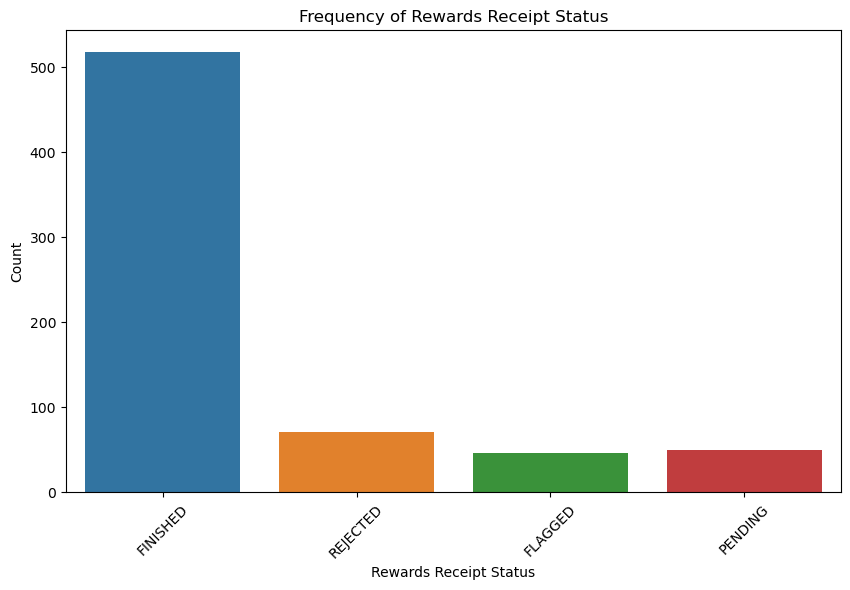

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_receipts_Vis, x='rewardsReceiptStatus')
plt.title('Frequency of Rewards Receipt Status')
plt.xlabel('Rewards Receipt Status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## Observation:

1) There are four distinct statuses shown on the x-axis: FINISHED, REJECTED, FLAGGED, and PENDING.

2) The FINISHED status has the highest count, which means that most of the rewards receipts are in the finished state.

3) The REJECTED and FLAGGED statuses have significantly fewer counts compared to FINISHED, with REJECTED being slightly higher    than FLAGGED.

4) The PENDING status has the lowest count among the four categories.

5) This kind of visualization helps in quickly assessing the operational efficiency and quality control aspects of the rewards    processing system. For example, a high number of REJECTED or FLAGGED receipts might point towards issues in the submission      process or strict criteria that users are not meeting, whereas many PENDING receipts could suggest a backlog or delay in        processing. 

In [116]:
#df_receipts_Vis

In [117]:
df_receipts_Vis['createDate'].isna().sum()

0

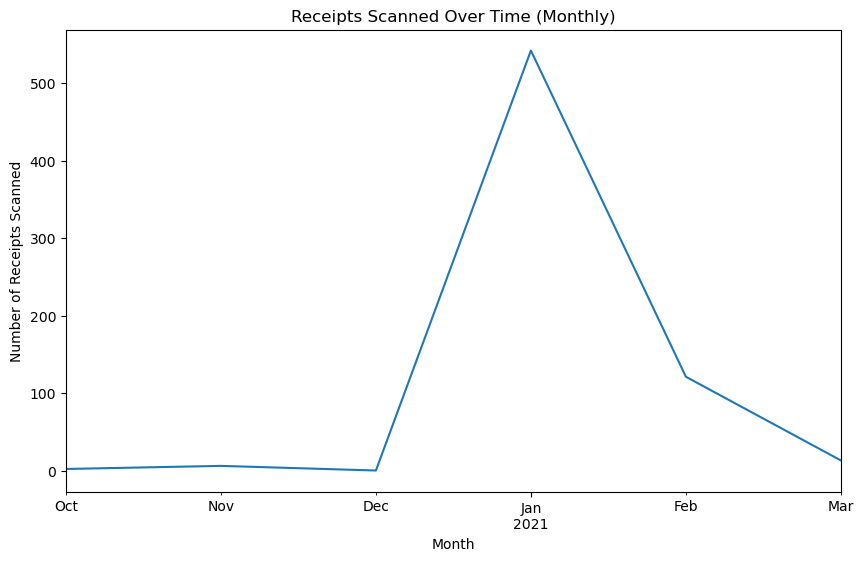

In [127]:

df_receipts_Vis['createDate'] = pd.to_datetime(df_receipts_Vis['createDate'])  
df_receipts_Vis.set_index('createDate', inplace=True)  

monthly_counts = df_receipts_Vis.resample('M').size()
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line')
plt.title('Receipts Scanned Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Receipts Scanned')
plt.show()

# Observation:

1) The line starts at a very low value in October, remains low in November, then there is a dramatic increase in December,        peaking at over 500 receipts.

2) After December, there is a sharp decline in January back to the lower levels observed in October and November.
   The number of receipts scanned in February and March appears to remain low, similar to the count before the December spike.

3) This graph might indicate seasonal behavior, with a significant peak in December, which could correspond with the holiday      season when more purchases and thus more receipts might be scanned. After the holidays, the activity seems to return to the    baseline level of the preceding months. 

4) The spike could also be related to a specific event or promotion that occurred in December. The graph suggests that the        scanning activity is not consistent throughout the months and may be influenced by seasonal factors or events.

In [ ]:
# 'dateScanned', 'finishedDate', 'modifyDate', 'pointsAwardedDate', 'purchaseDate']

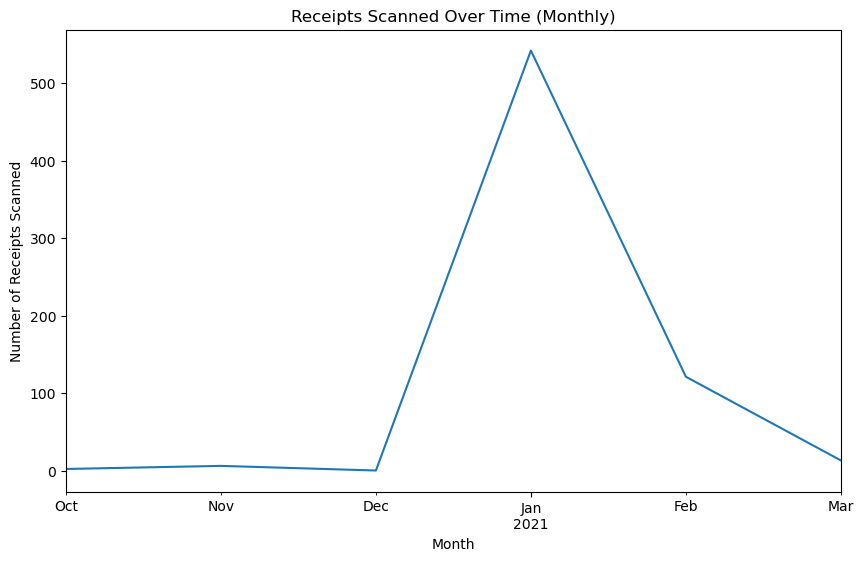

In [126]:
df_receipts_Vis['dateScanned'] = pd.to_datetime(df_receipts_Vis['dateScanned'])  
df_receipts_Vis.set_index('dateScanned', inplace=True)  

monthly_counts = df_receipts_Vis.resample('M').size()
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line')
plt.title('Receipts Scanned Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Receipts Scanned')
plt.show()

In [ ]:
## Lets Describe the dataframe to see whats the data type and what are the categorical and numeric feature.

In [128]:
df_receipts.describe()

,bonusPointsEarned,pointsEarned,purchasedItemCount,totalSpent
count,544.000000,609.000000,635.00000,684.000000
mean,238.893382,585.962890,14.75748,77.796857
std,299.091731,1357.166947,61.13424,347.110349
min,5.000000,0.000000,0.00000,0.000000
25%,5.000000,5.000000,1.00000,1.000000
50%,45.000000,150.000000,2.00000,18.200000
75%,500.000000,750.000000,5.00000,34.960000
max,750.000000,10199.800000,689.00000,4721.950000


In [132]:
#df_receipts

In [131]:
description = df_receipts.describe(include='all')
description

C:\Users\OMKAR\AppData\Local\Temp\ipykernel_6132\69324886.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  description = df_receipts.describe(include='all')


,r_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
count,1119,544.000000,544,1119,1119,568,1119,537,609.000000,671,635.00000,679,1119,684.000000,1119
unique,1119,NaN,9,1107,1107,553,1104,523,NaN,358,NaN,383,5,NaN,258
top,5ff1e1eb0a720f0523000575,NaN,All-receipts receipt bonus,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:34,2021-01-03 15:25:36,2021-01-03 15:25:34,NaN,2020-08-17 00:00:00,NaN,[{'description': 'flipbelt level terrain waist...,FINISHED,NaN,5fc961c3b8cfca11a077dd33
freq,1,NaN,183,3,3,3,3,3,NaN,40,NaN,50,518,NaN,436
first,NaN,NaN,NaN,2020-10-30 20:17:59,2020-10-30 20:17:59,2021-01-03 15:24:10,2021-01-03 15:24:10,2020-10-30 20:18:00,NaN,2017-10-30 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2021-03-01 23:17:34.772000,2021-03-01 23:17:34.772000,2021-02-26 22:36:25,2021-03-01 23:17:34.772000,2021-02-26 22:36:25,NaN,2021-03-08 17:37:13,NaN,NaN,NaN,NaN,NaN
mean,NaN,238.893382,NaN,NaN,NaN,NaN,NaN,NaN,585.962890,NaN,14.75748,NaN,NaN,77.796857,NaN
std,NaN,299.091731,NaN,NaN,NaN,NaN,NaN,NaN,1357.166947,NaN,61.13424,NaN,NaN,347.110349,NaN
min,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.00000,NaN,NaN,0.000000,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,1.00000,NaN,NaN,1.000000,NaN


# Observation
1) This Describe shows that r_id is unique so primary key over here 

2) Bonus points earned shows the max value the min etc that describe numeric feature 

3) This chart gives the visualization for the numeric and categorical feature 

In [ ]:
# By dropping the null values. 

In [133]:
#df_receipts_Vis.dropna(inplace=True)

In [154]:
df_receipts.isna().sum()

r_id                         0
bonusPointsEarned          575
bonusPointsEarnedReason    575
createDate                   0
dateScanned                  0
finishedDate               551
modifyDate                   0
pointsAwardedDate          582
pointsEarned               510
purchaseDate               448
purchasedItemCount         484
rewardsReceiptItemList     440
rewardsReceiptStatus         0
totalSpent                 435
userId                       0
dtype: int64

# Visualize the finaldf_receipts_rewards table 

In [135]:
finaldf_receipts_rewards.columns

Index(['reward_id', 'r_id', 'barcode', 'description', 'finalPrice',
       'itemPrice', 'needsFetchReview', 'partnerItemId',
       'preventTargetGapPoints', 'quantityPurchased', 'userFlaggedBarcode',
       'userFlaggedNewItem', 'userFlaggedPrice', 'userFlaggedQuantity',
       'needsFetchReviewReason', 'pointsNotAwardedReason', 'pointsPayerId',
       'rewardsGroup', 'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

In [137]:
#Shallow copy
finaldf_receipts_rewards_vis=finaldf_receipts_rewards.copy()

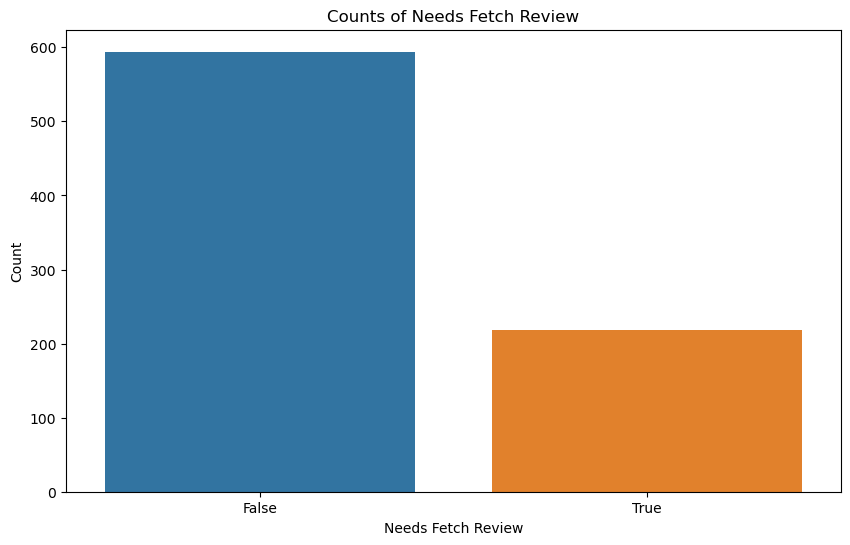

In [138]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=finaldf_receipts_rewards, x='needsFetchReview')
plt.title('Counts of Needs Fetch Review')
plt.xlabel('Needs Fetch Review')
plt.ylabel('Count')
plt.show()

# Observation
This diagram suggests that the process or criteria for flagging items for review is selective or that the majority of items typically meet the required standards, hence not needing further review. If this is a quality control measure, the graph might indicate that the system or process is effective, with only a smaller portion of items requiring further attention.

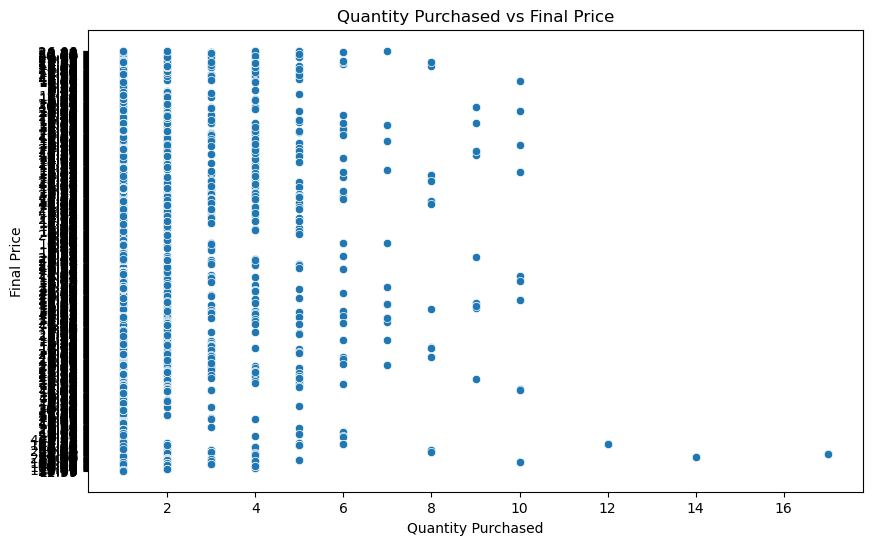

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=finaldf_receipts_rewards_vis, x='quantityPurchased', y='finalPrice')
plt.title('Quantity Purchased vs Final Price')
plt.xlabel('Quantity Purchased')
plt.ylabel('Final Price')
plt.show()

# Observation:
From the graph, we can infer that the majority of purchases involve single items or pairs. The outlier, occurring above 16, indicates a purchase of 16 units for a particular product.

In [142]:
#finaldf_receipts_rewards_vis

In [146]:
finaldf_receipts_rewards_vis['reward_id'] = finaldf_receipts_rewards_vis['reward_id'].astype(str)

In [149]:
finaldf_receipts_rewards['reward_id'] = finaldf_receipts_rewards['reward_id'].astype(str)

In [150]:
finaldf_receipts_rewards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   reward_id                           7381 non-null   object 
 1   r_id                                7381 non-null   object 
 2   barcode                             3090 non-null   object 
 3   description                         6560 non-null   object 
 4   finalPrice                          6767 non-null   object 
 5   itemPrice                           6767 non-null   object 
 6   needsFetchReview                    813 non-null    object 
 7   partnerItemId                       6941 non-null   object 
 8   preventTargetGapPoints              358 non-null    object 
 9   quantityPurchased                   6767 non-null   float64
 10  userFlaggedBarcode                  337 non-null    object 
 11  userFlaggedNewItem                  323 non

In [147]:
description_reward = finaldf_receipts_rewards_vis.describe(include='all')
description_reward

,reward_id,r_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
count,7381,7381,3090,6560,6767,6767,813,6941,358,6767.000000,...,153,15.000000,927,378,645,9,9,9,956,863
unique,7381,1119,568,1889,828,828,2,916,1,NaN,...,47,NaN,277,2,2,2,2,1,334,75
top,1,600f2fc80a720f0535000030,4011,ITEM NOT FOUND,9.99,9.99,False,1,True,NaN,...,4023,NaN,50.0,800,True,1.00,1.00,True,28.57,BEN AND JERRYS ICE CREAM
freq,1,459,177,173,355,355,594,531,358,NaN,...,92,NaN,123,299,468,6,6,9,50,180
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386139,...,NaN,1.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.204363,...,NaN,0.414039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:
description_reward.columns

Index(['reward_id', 'r_id', 'barcode', 'description', 'finalPrice',
       'itemPrice', 'needsFetchReview', 'partnerItemId',
       'preventTargetGapPoints', 'quantityPurchased', 'userFlaggedBarcode',
       'userFlaggedNewItem', 'userFlaggedPrice', 'userFlaggedQuantity',
       'needsFetchReviewReason', 'pointsNotAwardedReason', 'pointsPayerId',
       'rewardsGroup', 'rewardsProductPartnerId', 'userFlaggedDescription',
       'originalMetaBriteBarcode', 'originalMetaBriteDescription', 'brandCode',
       'competitorRewardsGroup', 'discountedItemPrice',
       'originalReceiptItemText', 'itemNumber',
       'originalMetaBriteQuantityPurchased', 'pointsEarned', 'targetPrice',
       'competitiveProduct', 'originalFinalPrice',
       'originalMetaBriteItemPrice', 'deleted', 'priceAfterCoupon',
       'metabriteCampaignId'],
      dtype='object')

In [152]:
description_reward['brandCode']

count       2600
unique       227
top       HY-VEE
freq         291
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: brandCode, dtype: object

#  Observation
1) The data shows that r_id has unique value of 1119 because you see from the main dataframe we have total 1119 rows and over there r_id was unique

2) The data shows that reward_id is unique which is our primary key

3) From this describe function we can also see the quantityPurchased feature has most of the value as 1 quantity and max as 17 which we see in the graph

4) We can also see needsfetchReview feature which shows that 594 of them doesnt need review while remaining needs

5) You can also figure out many of the feature has Null values

In [148]:
finaldf_receipts_rewards_vis.isna().sum()

reward_id                                0
r_id                                     0
barcode                               4291
description                            821
finalPrice                             614
itemPrice                              614
needsFetchReview                      6568
partnerItemId                          440
preventTargetGapPoints                7023
quantityPurchased                      614
userFlaggedBarcode                    7044
userFlaggedNewItem                    7058
userFlaggedPrice                      7082
userFlaggedQuantity                   7082
needsFetchReviewReason                7162
pointsNotAwardedReason                7041
pointsPayerId                         6114
rewardsGroup                          5650
rewardsProductPartnerId               5112
userFlaggedDescription                7176
originalMetaBriteBarcode              7310
originalMetaBriteDescription          7371
brandCode                             4781
competitorR

In [155]:
finaldf_receipts_rewards.head()

,reward_id,r_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,1,5ff1e1eb0a720f0523000575,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5ff1e1bb0a720f052300056b,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5ff1e1bb0a720f052300056b,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5ff1e1f10a720f052300057a,NaN,NaN,NaN,NaN,False,1,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5ff1e1ee0a7214ada100056f,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
# Find Duplicates in the data
duplicate_rows_finaldf_receipts_rewards = finaldf_receipts_rewards[finaldf_receipts_rewards.duplicated()]


In [162]:
duplicate_rows_finaldf_receipts_rewards

,reward_id,r_id,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,...,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId


In [159]:
df_receipts_copy=df_receipts.drop(['rewardsReceiptItemList'], axis = 1) 


In [160]:
df_receipts_copy.head()

,r_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [163]:
# Find Duplicates in the data

duplicate_rows_df_receipts_copy = df_receipts_copy[df_receipts_copy.duplicated()]
duplicate_rows_df_receipts_copy

,r_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId


In [ ]:
#finaldf_receipts_rewards[]

# I am using BrandCode and BarCode as the foriegn key over here but you see there are some Nulls value in it  so lets drop it 

In [169]:
finaldf_receipts_rewards.shape

(7381, 36)

In [171]:
#Shallow Copy
finaldf_receipts_rewards_copy=finaldf_receipts_rewards.copy()

In [172]:
finaldf_receipts_rewards_copy=finaldf_receipts_rewards_copy.dropna(subset=['barcode','brandCode'])


In [173]:
finaldf_receipts_rewards_copy.isna().sum()

reward_id                                0
r_id                                     0
barcode                                  0
description                              0
finalPrice                               0
itemPrice                                0
needsFetchReview                      1599
partnerItemId                            0
preventTargetGapPoints                1725
quantityPurchased                        0
userFlaggedBarcode                    1746
userFlaggedNewItem                    1746
userFlaggedPrice                      1746
userFlaggedQuantity                   1746
needsFetchReviewReason                1744
pointsNotAwardedReason                1434
pointsPayerId                          985
rewardsGroup                           741
rewardsProductPartnerId                412
userFlaggedDescription                1746
originalMetaBriteBarcode              1746
originalMetaBriteDescription          1746
brandCode                                0
competitorR

In [174]:
finaldf_receipts_rewards_copy.shape

(1746, 36)

#  Get the PreProcessed Data in CSV and JSON format 

In [164]:
# get the main data
df_receipts_copy.to_csv('RecieptData_Preprocessed.csv', index=False) 

In [165]:
df_receipts_copy.to_json('RecieptData_Preprocessed.json', orient='records', lines=True)

In [166]:
# get the Reward Data
finaldf_receipts_rewards.to_csv('RewardfromRecieptData_Preprocessed.csv', index=False) 

In [167]:
finaldf_receipts_rewards.to_json('RewardfromRecieptData_Preprocessed.json', orient='records', lines=True)

In [175]:
finaldf_receipts_rewards_copy.to_csv('RewardfromRecieptData_Preprocessed_SQL.csv', index=False) 